# (Approach 2 of 3): Return prediction using Support Vector Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('addedcolumns.csv')

data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')

data = data.reset_index(drop=True)
Time = data.pop('timestamp')

Date_Time = Time
Date_Time = pd.to_numeric(Date_Time, errors='coerce')
Date_Time = pd.to_datetime(Date_Time, unit = 'ms')

In [24]:
data.head()

,BINANCE_BTC-USDT_ask_1,BINANCE_BTC-USDT_askq_1,BINANCE_BTC-USDT_bid_1,BINANCE_BTC-USDT_bidq_1,BINANCE_BTC-USDT_ask_2,BINANCE_BTC-USDT_askq_2,BINANCE_BTC-USDT_bid_2,BINANCE_BTC-USDT_bidq_2,BINANCE_BTC-USDT_ask_3,BINANCE_BTC-USDT_askq_3,...,aten1,aten2,aten3,aten4,acc_diff_P,acc_diff_v,mean_P_ask,mean_P_bid,mean_V_ask,mean_V_bid
0,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,-100,-140,-190,-200,8660,461,104128.5,103262.5,1422.3,1376.2
1,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,-100,-140,-190,-200,8660,511,104128.5,103262.5,1427.3,1376.2
2,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,-100,-140,-190,-200,8660,611,104128.5,103262.5,1437.3,1376.2
3,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,-100,-140,-190,-200,8660,711,104128.5,103262.5,1447.3,1376.2
4,103800,1105,103715,20,103900,1907,103700,2,103940,1000,...,-100,-140,-190,-200,8660,811,104128.5,103262.5,1457.3,1376.2


In [6]:
col = list(data)

col1 = col[0:40]
col1 = col1[:20]

for i in col:
    data[i] = pd.to_numeric(data[i], errors='coerce')

df = data
df_slope = pd.DataFrame(columns=col1)

df['mid_p_Y'] = (df['BINANCE_BTC-USDT_ask_1'] + df['BINANCE_BTC-USDT_bid_1']) / 2

## Dependent variable: 
## Return = (MidPrice<sub>t+100</sub>  / MidPrice<sub>t</sub>) - 1

In [7]:
Prev = []
slope = []
Ret = []

Past_ticks = 1000
Fut_ticks = 100

for i in range(Past_ticks, len(data)):
    up = i + Fut_ticks
    if up > (len(data)-1):
        break
    rr = (df['mid_p_Y'][up] / df['mid_p_Y'][i]) - 1
    Ret.append(rr)

Prev, Ret = np.array(Prev), np.array(Ret)

for var in col1:
    for i in range(Past_ticks, len(data)):
        time = Time[i]-Time[i-Past_ticks]
        #time = 1
        slope.append((data[var][i] - data[var][i-Past_ticks]) / time) 
    df_slope[var] = slope
    slope = []

df_slope.columns = [str(col1_) + '_slope' for col1_ in df_slope.columns]

In [31]:
L = list(df_slope)
print(len(L))
L

20


['BINANCE_BTC-USDT_ask_1_slope',
 'BINANCE_BTC-USDT_askq_1_slope',
 'BINANCE_BTC-USDT_bid_1_slope',
 'BINANCE_BTC-USDT_bidq_1_slope',
 'BINANCE_BTC-USDT_ask_2_slope',
 'BINANCE_BTC-USDT_askq_2_slope',
 'BINANCE_BTC-USDT_bid_2_slope',
 'BINANCE_BTC-USDT_bidq_2_slope',
 'BINANCE_BTC-USDT_ask_3_slope',
 'BINANCE_BTC-USDT_askq_3_slope',
 'BINANCE_BTC-USDT_bid_3_slope',
 'BINANCE_BTC-USDT_bidq_3_slope',
 'BINANCE_BTC-USDT_ask_4_slope',
 'BINANCE_BTC-USDT_askq_4_slope',
 'BINANCE_BTC-USDT_bid_4_slope',
 'BINANCE_BTC-USDT_bidq_4_slope',
 'BINANCE_BTC-USDT_ask_5_slope',
 'BINANCE_BTC-USDT_askq_5_slope',
 'BINANCE_BTC-USDT_bid_5_slope',
 'BINANCE_BTC-USDT_bidq_5_slope']

In [8]:
df['b_a_spread'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_bid_1']

df['b12'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_2']
df['b13'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_3']
df['b14'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_4']
df['b15'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_5']
#df['b16'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_6']
#df['b17'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_7']
#df['b18'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_8']
#df['b19'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_9']
#df['b1ten'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_10']

df['aten1'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_2']
df['aten2'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_3']
df['aten3'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_4']
df['aten4'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_5']
#df['aten5'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_6']
#df['aten6'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_7']
#df['aten7'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_8']
#df['aten8'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_9']
#df['aten9'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_10']


Total_P_ask = df['BINANCE_BTC-USDT_ask_1']+df['BINANCE_BTC-USDT_ask_10']+df['BINANCE_BTC-USDT_ask_2']+df['BINANCE_BTC-USDT_ask_3']+df['BINANCE_BTC-USDT_ask_4']+df['BINANCE_BTC-USDT_ask_5']+df['BINANCE_BTC-USDT_ask_6']+df['BINANCE_BTC-USDT_ask_7']+df['BINANCE_BTC-USDT_ask_8']+df['BINANCE_BTC-USDT_ask_9']
Total_P_bid = df['BINANCE_BTC-USDT_bid_1']+df['BINANCE_BTC-USDT_bid_10']+df['BINANCE_BTC-USDT_bid_2']+df['BINANCE_BTC-USDT_bid_3']+df['BINANCE_BTC-USDT_bid_4']+df['BINANCE_BTC-USDT_bid_5']+df['BINANCE_BTC-USDT_bid_6']+df['BINANCE_BTC-USDT_bid_7']+df['BINANCE_BTC-USDT_bid_8']+df['BINANCE_BTC-USDT_bid_9']

Total_V_ask = df['BINANCE_BTC-USDT_askq_1']+df['BINANCE_BTC-USDT_askq_10']+df['BINANCE_BTC-USDT_askq_2']+df['BINANCE_BTC-USDT_askq_3']+df['BINANCE_BTC-USDT_askq_4']+df['BINANCE_BTC-USDT_askq_5']+df['BINANCE_BTC-USDT_askq_6']+df['BINANCE_BTC-USDT_askq_7']+df['BINANCE_BTC-USDT_askq_8']+df['BINANCE_BTC-USDT_askq_9']
Total_V_bid = df['BINANCE_BTC-USDT_bidq_1']+df['BINANCE_BTC-USDT_bidq_10']+df['BINANCE_BTC-USDT_bidq_2']+df['BINANCE_BTC-USDT_bidq_3']+df['BINANCE_BTC-USDT_bidq_4']+df['BINANCE_BTC-USDT_bidq_5']+df['BINANCE_BTC-USDT_bidq_6']+df['BINANCE_BTC-USDT_bidq_7']+df['BINANCE_BTC-USDT_bidq_8']+df['BINANCE_BTC-USDT_bidq_9']

df['acc_diff_P'] = Total_P_ask - Total_P_bid
df['acc_diff_v'] = Total_V_ask - Total_V_bid
df['mean_P_ask'] = Total_P_ask / 10
df['mean_P_bid'] = Total_P_bid / 10
df['mean_V_ask'] = Total_V_ask / 10
df['mean_V_bid'] = Total_V_bid / 10

In [9]:
df = df[Past_ticks: -Fut_ticks]
df_slope = df_slope[: -Fut_ticks]
#Prev = Prev[:-Fut_ticks, :]

qw = list(df)


AR_ = df.iloc[:, 40:].values

#df_ar = np.concatenate((AR, AR_), axis = 1)

df_cat_dfslope = np.concatenate((AR_, df_slope.values), axis = 1)
Feature = df_cat_dfslope
#Feature = np.concatenate((df_cat_dfslope,Prev),axis=1)

In [33]:
LL = list(qw[40:])
print(len(LL))
LL

32


['New_Sell_Orders_No',
 'Sum_Sell_Order_Prices',
 'Total_Qty_Sell_Orders',
 'New_Buy_Orders_No',
 'Sum_Buy_Order_Prices',
 'Total_Qty_Buy_Orders',
 'Sell_Orders_No_Cancelled',
 'Sum_Sell_Order_Prices_Cancelled',
 'Total_Qty_Sell_Orders_Cancelled',
 'Buy_Orders_No_Cancelled',
 'Sum_Buy_Order_Prices_Cancelled',
 'Total_Qty_Buy_Orders_Cancelled',
 'No_of_Trades',
 'Trade_Price_Sum',
 'Trade_Qty_Sum',
 'LTP',
 'mid_p_Y',
 'b_a_spread',
 'b12',
 'b13',
 'b14',
 'b15',
 'aten1',
 'aten2',
 'aten3',
 'aten4',
 'acc_diff_P',
 'acc_diff_v',
 'mean_P_ask',
 'mean_P_bid',
 'mean_V_ask',
 'mean_V_bid']

In [10]:
Feature.shape

(132932, 52)

## Total Independant features: 52
'BINANCE_BTC-USDT_ask_1_slope',
 'BINANCE_BTC-USDT_askq_1_slope',
 'BINANCE_BTC-USDT_bid_1_slope',
 'BINANCE_BTC-USDT_bidq_1_slope',
 'BINANCE_BTC-USDT_ask_2_slope',
 'BINANCE_BTC-USDT_askq_2_slope',
 'BINANCE_BTC-USDT_bid_2_slope',
 'BINANCE_BTC-USDT_bidq_2_slope',
 'BINANCE_BTC-USDT_ask_3_slope',
 'BINANCE_BTC-USDT_askq_3_slope',
 'BINANCE_BTC-USDT_bid_3_slope',
 'BINANCE_BTC-USDT_bidq_3_slope',
 'BINANCE_BTC-USDT_ask_4_slope',
 'BINANCE_BTC-USDT_askq_4_slope',
 'BINANCE_BTC-USDT_bid_4_slope',
 'BINANCE_BTC-USDT_bidq_4_slope',
 'BINANCE_BTC-USDT_ask_5_slope',
 'BINANCE_BTC-USDT_askq_5_slope',
 'BINANCE_BTC-USDT_bid_5_slope',
 'BINANCE_BTC-USDT_bidq_5_slope'
 
 'New_Sell_Orders_No',
 'Sum_Sell_Order_Prices',
 'Total_Qty_Sell_Orders',
 'New_Buy_Orders_No',
 'Sum_Buy_Order_Prices',
 'Total_Qty_Buy_Orders',
 'Sell_Orders_No_Cancelled',
 'Sum_Sell_Order_Prices_Cancelled',
 'Total_Qty_Sell_Orders_Cancelled',
 'Buy_Orders_No_Cancelled',
 'Sum_Buy_Order_Prices_Cancelled',
 'Total_Qty_Buy_Orders_Cancelled',
 'No_of_Trades',
 'Trade_Price_Sum',
 'Trade_Qty_Sum',
 'LTP',
 'mid_p_Y',
 'b_a_spread',
 'b12',
 'b13',
 'b14',
 'b15',
 'aten1',
 'aten2',
 'aten3',
 'aten4',
 'acc_diff_P',
 'acc_diff_v',
 'mean_P_ask',
 'mean_P_bid',
 'mean_V_ask',
 'mean_V_bid'

## Dependent variable: 
## Return = (MidPrice<sub>t+100</sub>  / MidPrice<sub>t</sub>) - 1

In [38]:
Ret = Ret.reshape(-1,1)

## Returns of first 2500 samples:

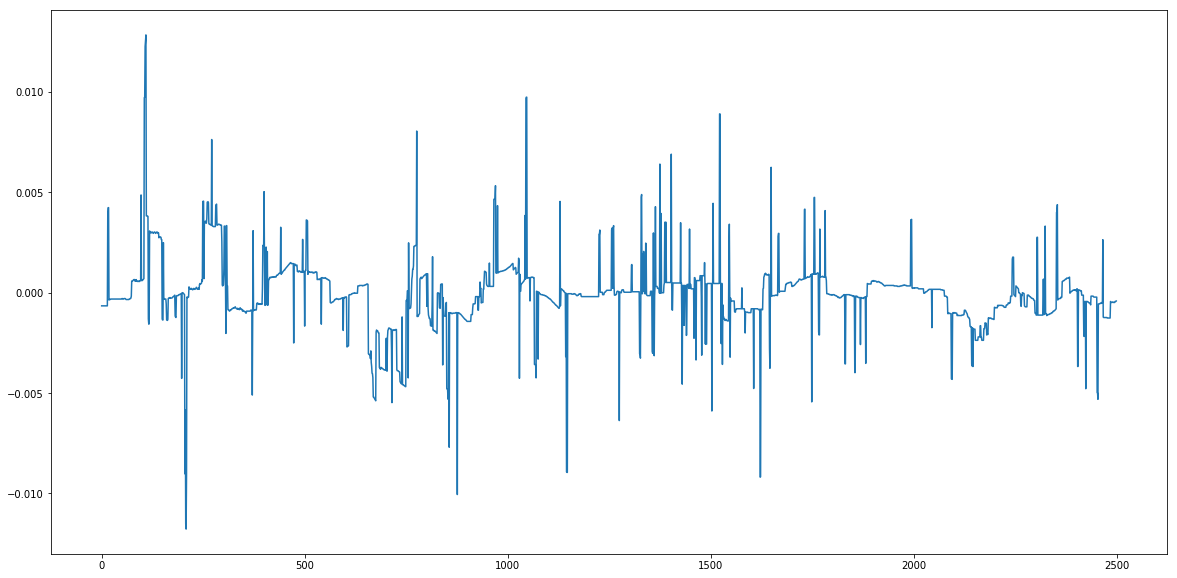

In [42]:
plt.figure(figsize=(20,10))
plt.plot(Ret[:2500])
plt.show()

In [ ]:
Ret_ = np.clip(Ret, -0.0001, 0.0001)

# Returns of first 2500 samples clipped between  -0.0001 to 0.0001 :

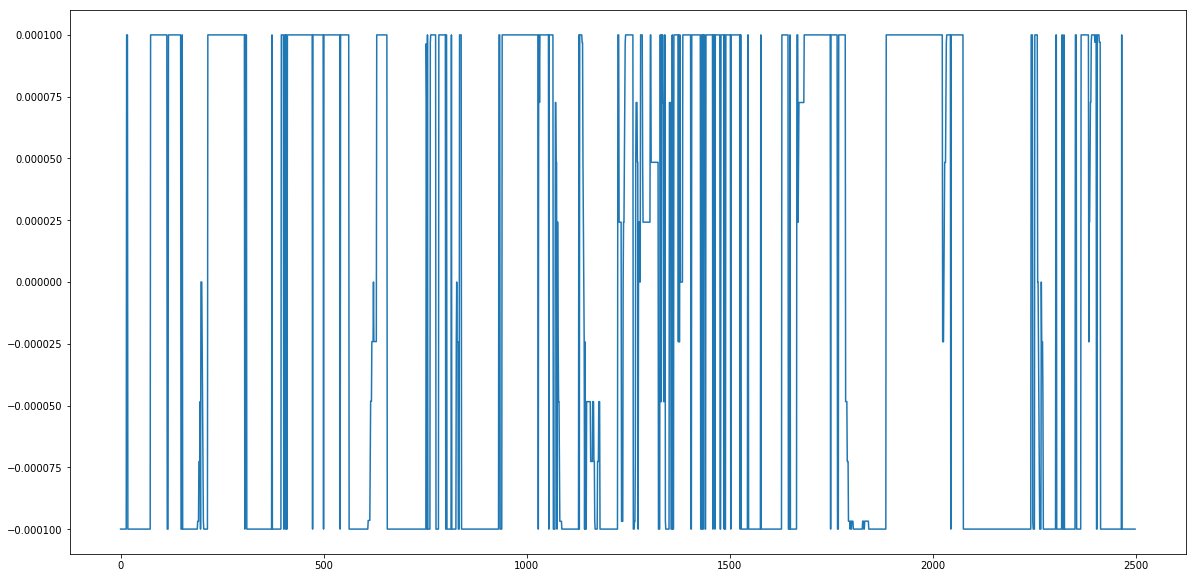

In [52]:
plt.figure(figsize=(20,10))
plt.plot(Ret_[:2500])
plt.show()

In [ ]:
Ret_amp = Ret_*10000

## Returns up-scaled by a factor of 10000:

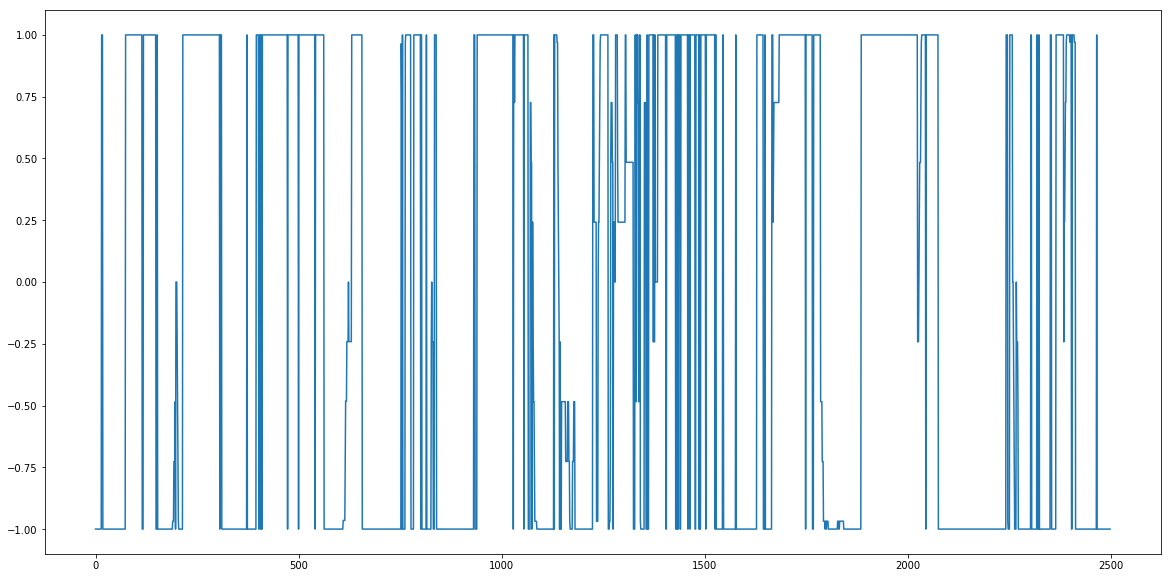

In [50]:
plt.figure(figsize=(20,10))
plt.plot(Ret_amp[:2500])
plt.show()

## Total samples: 133132
## Test-data: last 1500 samples (1.12 % of total data)
## Train-data: remaining 131632 samples

In [11]:
X_train = Feature[:-1500]
X_test =  Feature[-1500:]
y_train = Ret_amp[:-1500]
y_test =  Ret_amp[-1500:]

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [ ]:
"""
from sklearn.svm import SVR
reg_ = SVR(kernel = 'rbf')
reg_.fit(X_train, y_train)

"""

In [13]:
import pickle

## Pickling the saved model (trained on Friday, Jun 22):

In [14]:
model_pkl = open('svr_complete.pkl', 'rb')
reg_ = pickle.load(model_pkl)


In [15]:
y_pred = reg_.predict(X_test)

In [16]:
y_pred_inv = sc_y.inverse_transform(y_pred)

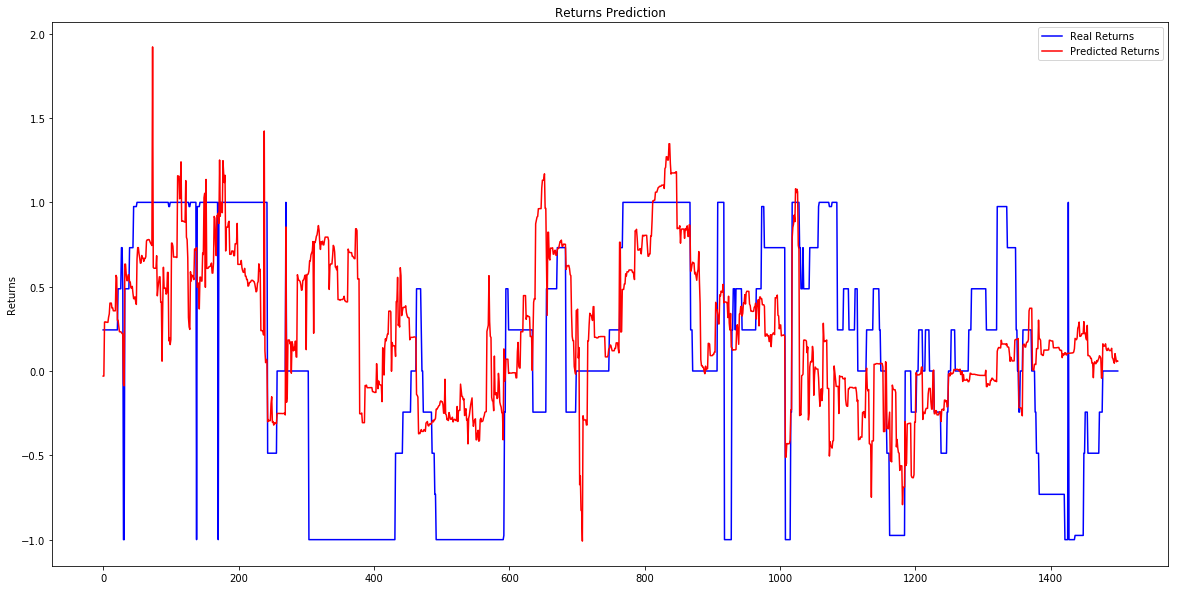

In [23]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label = 'Real Returns', color = 'blue')
plt.plot(y_pred_inv, label = 'Predicted Returns', color = 'red')
plt.title('Returns Prediction')
plt.ylabel('Returns')
plt.legend()
plt.show()

## Mean MSE (Mean Squared Error)

## MSE = 1/n   <sub>i=1</sub><sup>n</sup>∑ (Xi^−Xi)2

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mse = mean_squared_error(y_pred_inv, y_test)

In [55]:
mse

0.44087282310932846